# XAI - Water Quality in Brisbane


Research question: How can machine learning models predict Dissolved Oxygen levels in water, and what factors most influence these predictions?

## Read and clean dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

: 

In [30]:
df = pd.read_csv('../data/brisbane_water_quality.csv')

In [31]:
df.describe()

,Record number,Average Water Speed,Average Water Direction,Chlorophyll,Chlorophyll [quality],Temperature,Temperature [quality],Dissolved Oxygen,Dissolved Oxygen [quality],Dissolved Oxygen (%Saturation),Dissolved Oxygen (%Saturation) [quality],pH,pH [quality],Salinity,Salinity [quality],Specific Conductance,Specific Conductance [quality],Turbidity,Turbidity [quality]
count,30894.000000,30874.000000,30893.000000,30309.000000,30086.000000,25730.000000,25550.000000,26594.000000,26370.000000,25145.000000,24944.000000,29810.000000,29586.0,26936.000000,26712.0,29527.000000,29303.0,28894.000000,28670.0
mean,16914.500000,16.799189,177.544711,2.782251,1020.006648,24.415394,1021.673973,6.815158,1020.488055,96.641207,1022.976668,8.063260,1020.0,31.003265,1020.0,47.927487,1020.0,3.941688,1020.0
std,8918.473945,13.168964,103.621786,1.859404,1.153049,3.494728,40.599400,0.620860,21.976218,8.108339,54.204781,0.091714,0.0,3.469102,0.0,5.155305,0.0,4.072715,0.0
min,1468.000000,0.000000,0.000000,0.100000,1020.000000,17.000000,1020.000000,3.030000,1020.000000,51.836000,1020.000000,7.309000,1020.0,0.057000,1020.0,0.021000,1020.0,0.335000,1020.0
25%,9191.250000,6.594250,86.314000,1.451000,1020.000000,21.292000,1020.000000,6.387000,1020.000000,92.226000,1020.000000,7.980000,1020.0,29.151000,1020.0,45.046000,1020.0,2.354250,1020.0
50%,16914.500000,13.390500,176.326000,2.371000,1020.000000,25.245500,1020.000000,6.814000,1020.000000,96.513000,1020.000000,8.073000,1020.0,30.603500,1020.0,47.420000,1020.0,3.093000,1020.0
75%,24637.750000,23.600000,267.870000,3.650000,1020.000000,27.254000,1020.000000,7.254000,1020.000000,101.668000,1020.000000,8.140000,1020.0,33.918000,1020.0,53.361000,1020.0,4.005000,1020.0
max,32361.000000,89.912000,359.994000,43.301000,1220.000000,32.063000,2010.000000,9.260000,2010.000000,134.082000,2010.000000,8.255000,1020.0,36.000000,1020.0,54.996000,1020.0,49.869000,1020.0


In [32]:
# [quality] columns contain metadata about the quality of the measurement. We however do not have access to what the specific codes actually mean.
# Therefore they have no use to us in this analysis, and we therefore drop them.

df = df.drop(columns=[col for col in df.columns if '[quality]' in col])


In [33]:
# Ensure that Timestamp column is of datetime type
df['Timestamp'] = pd.to_datetime(df['Timestamp'])


In [34]:
# Set Timestamp as index
df = df.set_index('Timestamp')

In [35]:
# All columns should now have the correct datatype (datetime timestamp, int record number, all other are floats)

df.dtypes

Record number                       int64
Average Water Speed               float64
Average Water Direction           float64
Chlorophyll                       float64
Temperature                       float64
Dissolved Oxygen                  float64
Dissolved Oxygen (%Saturation)    float64
pH                                float64
Salinity                          float64
Specific Conductance              float64
Turbidity                         float64
dtype: object

In [36]:
# For some measurements, the values are missing (nan).
print(f"Total number of rows: {df.shape[0]}")
print(f"Number of rows without any NaN values: {df.dropna().shape[0]}")

Total number of rows: 30894
Number of rows without any NaN values: 19373


In [37]:
# We can fill these missing values using interpolation.
# This is a common technique used in time series analysis to fill missing values in time series data. 

df = df.interpolate(method='time')

In [38]:
# Now all rows have values for all columns
print(f"Total number of rows: {df.shape[0]}")
print(f"Number of rows without any NaN values: {df.dropna().shape[0]}")

Total number of rows: 30894
Number of rows without any NaN values: 30894


In [39]:
# Want to include timestamp information as features, in case its relevant for oxygen level
#df['Timestamp'] = df.index.astype(int)
#df['MonthOfYear'] = df.index.month
#df['DayOfYear'] = df.index.dayofyear



## Exploratory Data Analysis

In [40]:
df

,Record number,Average Water Speed,Average Water Direction,Chlorophyll,Temperature,Dissolved Oxygen,Dissolved Oxygen (%Saturation),pH,Salinity,Specific Conductance,Turbidity
Timestamp,,,,,,,,,,,
2023-08-04 23:00:00,1468,4.834,73.484,1.621,20.018,7.472,101.175,8.176,35.215,53.262,2.068
2023-08-04 23:30:00,1469,2.544,106.424,1.959,19.986,7.455,100.884,8.175,35.209,53.254,1.994
2023-08-04 23:00:00,1470,1.260,156.755,1.620,20.001,7.430,100.571,8.171,35.207,53.252,2.030
2023-08-04 23:30:00,1471,0.760,281.754,1.761,19.983,7.419,100.398,8.171,35.211,53.257,1.973
2023-08-04 23:00:00,1472,3.397,244.637,1.635,19.986,7.429,100.538,8.171,35.208,53.253,1.944
...,...,...,...,...,...,...,...,...,...,...,...
2024-06-27 08:20:00,32357,13.314,82.720,0.944,18.607,6.876,87.556,8.151,29.268,45.134,3.963
2024-06-27 08:30:00,32358,32.617,18.081,1.161,18.551,6.918,87.987,8.163,29.254,45.115,3.928
2024-06-27 08:40:00,32359,8.552,306.184,1.192,18.558,6.651,84.606,8.145,29.250,45.110,4.097


### Plot oxygen levels, by time

In [41]:
# Create columns for each unique month, and day.

plot_df = df.copy()

plot_df['Year-Month'] = plot_df.index.to_period('M').astype(str)
plot_df['Year-Month-Day'] = plot_df.index.to_period('D').astype(str)

In [42]:
plot_df

,Record number,Average Water Speed,Average Water Direction,Chlorophyll,Temperature,Dissolved Oxygen,Dissolved Oxygen (%Saturation),pH,Salinity,Specific Conductance,Turbidity,Year-Month,Year-Month-Day
Timestamp,,,,,,,,,,,,,
2023-08-04 23:00:00,1468,4.834,73.484,1.621,20.018,7.472,101.175,8.176,35.215,53.262,2.068,2023-08,2023-08-04
2023-08-04 23:30:00,1469,2.544,106.424,1.959,19.986,7.455,100.884,8.175,35.209,53.254,1.994,2023-08,2023-08-04
2023-08-04 23:00:00,1470,1.260,156.755,1.620,20.001,7.430,100.571,8.171,35.207,53.252,2.030,2023-08,2023-08-04
2023-08-04 23:30:00,1471,0.760,281.754,1.761,19.983,7.419,100.398,8.171,35.211,53.257,1.973,2023-08,2023-08-04
2023-08-04 23:00:00,1472,3.397,244.637,1.635,19.986,7.429,100.538,8.171,35.208,53.253,1.944,2023-08,2023-08-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-27 08:20:00,32357,13.314,82.720,0.944,18.607,6.876,87.556,8.151,29.268,45.134,3.963,2024-06,2024-06-27
2024-06-27 08:30:00,32358,32.617,18.081,1.161,18.551,6.918,87.987,8.163,29.254,45.115,3.928,2024-06,2024-06-27
2024-06-27 08:40:00,32359,8.552,306.184,1.192,18.558,6.651,84.606,8.145,29.250,45.110,4.097,2024-06,2024-06-27


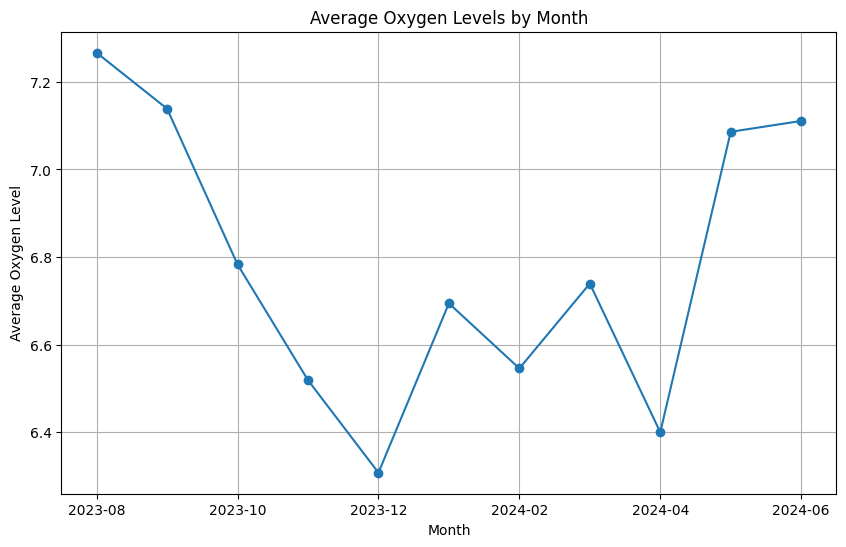

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by month and calculate the mean Dissolved Oxygen for each month
monthly_oxygen_levels = plot_df.groupby('Year-Month')['Dissolved Oxygen'].mean()

# Plot the results
plt.figure(figsize=(10, 6))
monthly_oxygen_levels.plot(kind='line', marker='o')
plt.title('Average Oxygen Levels by Month')
plt.xlabel('Month')
plt.ylabel('Average Oxygen Level')
plt.grid(True)
plt.show()

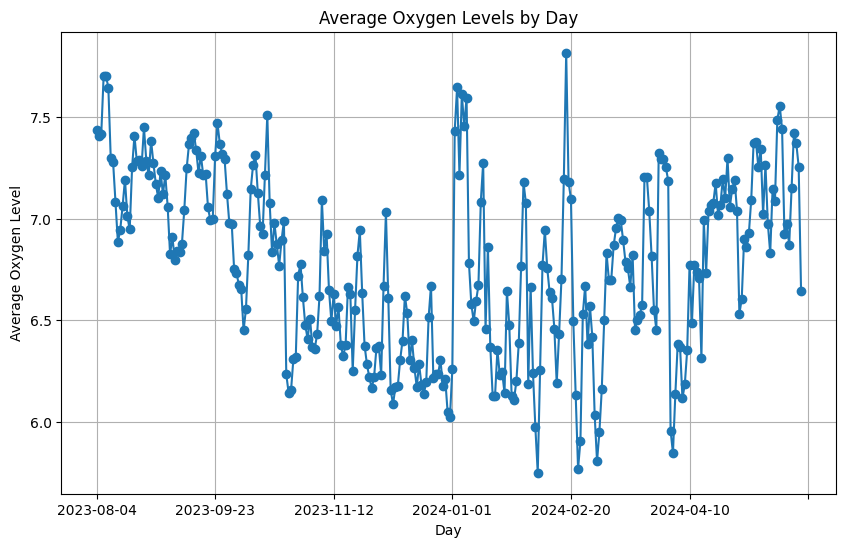

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by day and calculate the mean Dissolved Oxygen for each day
daily_oxygen_levels = plot_df.groupby('Year-Month-Day')['Dissolved Oxygen'].mean()

# Plot the results
plt.figure(figsize=(10, 6))
daily_oxygen_levels.plot(kind='line', marker='o')
plt.title('Average Oxygen Levels by Day')
plt.xlabel('Day')
plt.ylabel('Average Oxygen Level')
plt.grid(True)
plt.show()

### Features correlated with oxygen

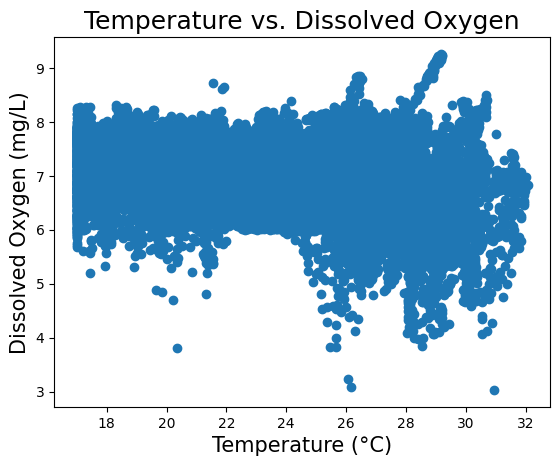

In [45]:
#plot 1: How tamperature affects Dissolved Oxygen
plt.scatter(df['Temperature'], df['Dissolved Oxygen'])
plt.xlabel ('Temperature (°C)', size=15)
plt.ylabel ('Dissolved Oxygen (mg/L)', size=15)
plt.title ('Temperature vs. Dissolved Oxygen', size=18)
plt.show()

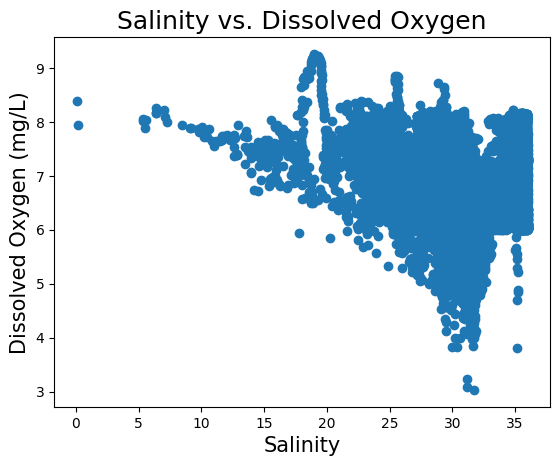

In [46]:
plt.scatter(df['Salinity'], df['Dissolved Oxygen'])
plt.xlabel ('Salinity', size =15)
plt.ylabel('Dissolved Oxygen (mg/L)', size=15)
plt.title ('Salinity vs. Dissolved Oxygen', size=18)
plt.show()

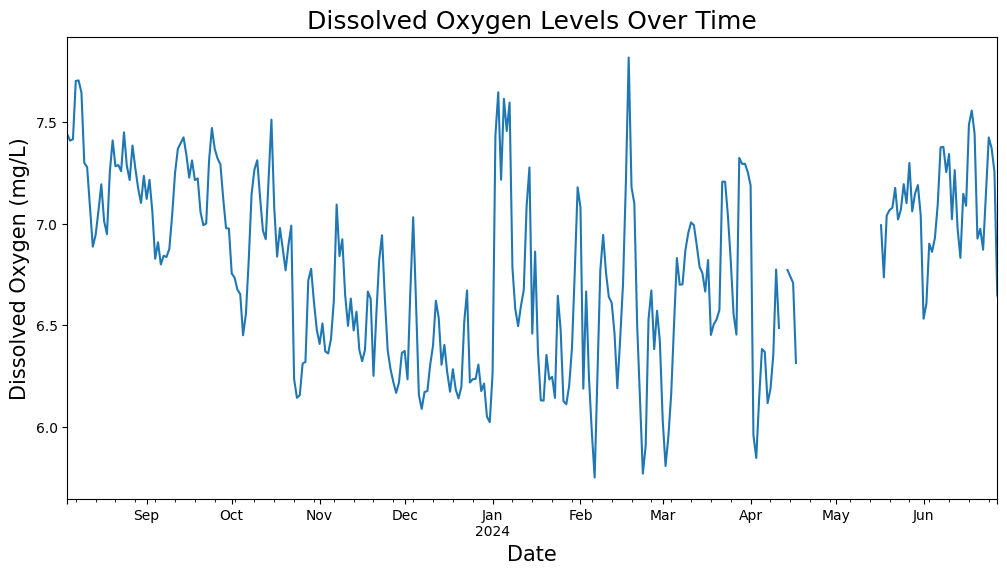

In [47]:
df.resample('D').mean()['Dissolved Oxygen'].plot(figsize=(12,6))
plt.xlabel('Date', size=15)
plt.ylabel('Dissolved Oxygen (mg/L)', size=15)
plt.title('Dissolved Oxygen Levels Over Time', size=18)
plt.show()

### Correlation Matrix

In order to investigate how different features of the dataset relates eachother, we can create a correlation matrix.

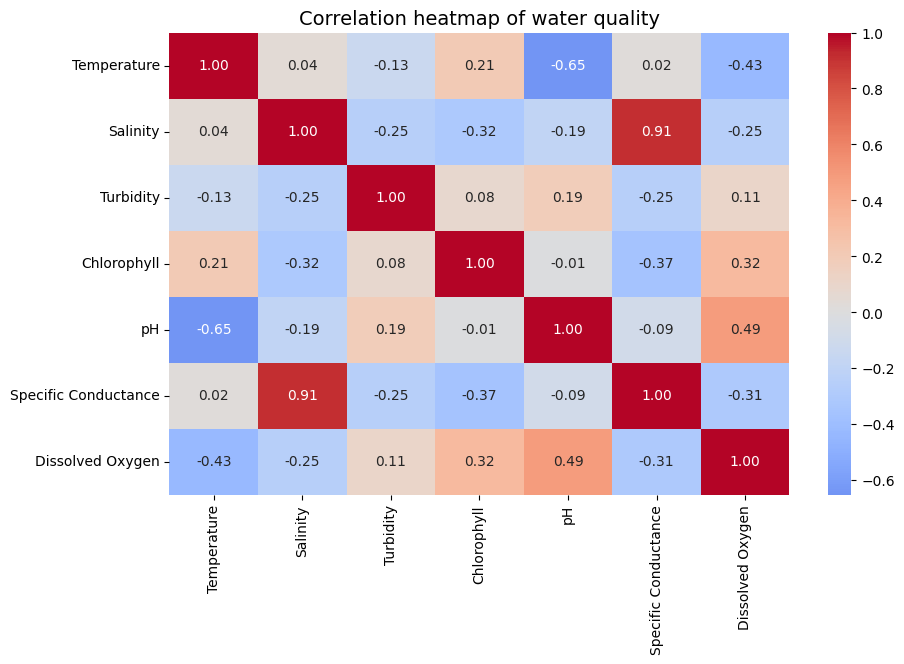

In [48]:
import seaborn as sns

features =[ "Temperature", "Salinity", "Turbidity", "Chlorophyll", "pH", "Specific Conductance", "Dissolved Oxygen" ]

correlation_matrix = df[features].corr()

#Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(
    correlation_matrix,
    cmap='coolwarm',
    center=0,
    annot=True,
    fmt=".2f"
)
plt.title("Correlation heatmap of water quality", fontsize=14)
plt.show()

A positive correlation (closer to +1), that indicates the one feature increases, the other increases. For example

While the negative correlation (closer to -1) means that as one feature increases, the other decreases. For instance, higher tempratures is likely reduced dissolved oxygen levels.

A correlation close to 0 suggest that it is a weak or no relashionship between the features, meaning that changes in one feture do not significantly affect the other.

## Model

1. 2/ Autoregressive Integrated Moving Average (ARIMA)- mest kjent
2. Seasonal Autoregressive Integrated Moving-Average (SARIMA)
3. 3/ Long Short-Term Memory (LSTM): Long Short-Term Memory (LSTM) is a type of recurrent neural network that can learn the order dependence between items in a sequence. It is often used to solve time series forecasting problems.

Forecasting evaluation involves metrics like scale-dependent errors such as Mean squared error(MSE) and Root mean squared error (RMSE), Percentage errors such as Mean absolute percentage error (MAPE), Scaled errors such as Mean absolute scaled error (MASE) to mention a few. These metrics are actually similar to static ML metrics. 

In [70]:
from sklearn.model_selection import train_test_split

# X are features. 
# We remove Dissolved Oxygen (target) and Dissolved Oxygen (%Saturation), as it is a derived value.
# We also remove RecordNumber as it is just an index.

X = df.drop(columns=['Dissolved Oxygen', 'Dissolved Oxygen (%Saturation)', 'Record number'])
# Y are the target value - we want to predict amount of Dissolved Oxygen
y = df['Dissolved Oxygen']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Linear Regression

In [71]:
from sklearn.linear_model  import LinearRegression

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

#### Lasso Regression

In [72]:
from sklearn.linear_model  import Lasso

model_lasso = Lasso()
model_lasso.fit(X_train, y_train)

Lasso()

#### Random Forest Regressor

In [73]:
from sklearn.ensemble import RandomForestRegressor

model_rfr = RandomForestRegressor(n_estimators=100, random_state=42)
model_rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

#### XGBoost

In [74]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

#### Neural Network - Must be LSTM(RNN) fix later

In [75]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)  # Reshape for compatibility
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# Create a dataset and data loader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Define the neural network
class NeuralNetwork(nn.Module):
    def __init__(self, input_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 1)  # Output layer for regression

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x
    
    # Add a predict method
    def predict(self, X):
        self.eval()  # Set the model to evaluation mode
        with torch.no_grad():
            X_tensor = torch.tensor(X.values, dtype=torch.float32)  # Convert input to tensor
            predictions = self(X_tensor)  # Forward pass
        return predictions.numpy()  # Convert predictions to NumPy array


# Initialize the model, loss function, and optimizer
input_size = X_train.shape[1]
model_nn = NeuralNetwork(input_size)
criterion = nn.MSELoss()  # Mean Squared Error for regression
optimizer = optim.Adam(model_nn.parameters(), lr=0.001)

# Train the model
epochs = 50
for epoch in range(epochs):
    model_nn.train()
    for batch_X, batch_y in train_loader:
        # Forward pass
        predictions = model_nn(batch_X)
        loss = criterion(predictions, batch_y)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Print loss for every epoch
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")

# Evaluate the model on the test set
model_nn.eval()
with torch.no_grad():
    test_predictions = model_nn(X_test_tensor)
    test_loss = criterion(test_predictions, y_test_tensor)
    print(f"Test Loss: {test_loss.item()}")

Epoch 1/50, Loss: 0.4727783501148224
Epoch 2/50, Loss: 0.1958705484867096
Epoch 3/50, Loss: 0.08237453550100327
Epoch 4/50, Loss: 0.12742343544960022
Epoch 5/50, Loss: 0.5759294033050537
Epoch 6/50, Loss: 0.2679043710231781
Epoch 7/50, Loss: 0.16698694229125977
Epoch 8/50, Loss: 0.31166574358940125
Epoch 9/50, Loss: 0.23321498930454254
Epoch 10/50, Loss: 0.18400315940380096
Epoch 11/50, Loss: 0.5074556469917297
Epoch 12/50, Loss: 0.21150988340377808
Epoch 13/50, Loss: 0.4071275591850281
Epoch 14/50, Loss: 0.3829968273639679
Epoch 15/50, Loss: 0.11123251169919968
Epoch 16/50, Loss: 0.16720525920391083
Epoch 17/50, Loss: 0.12765763700008392
Epoch 18/50, Loss: 0.17867931723594666
Epoch 19/50, Loss: 0.12769918143749237
Epoch 20/50, Loss: 0.2793540954589844
Epoch 21/50, Loss: 0.2926817238330841
Epoch 22/50, Loss: 0.26844534277915955
Epoch 23/50, Loss: 0.20921729505062103
Epoch 24/50, Loss: 0.20515374839305878
Epoch 25/50, Loss: 0.41515809297561646
Epoch 26/50, Loss: 0.1972886025905609
Epoch

#### SARIMAX 


## Evalute model against test data

In [52]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


def eval_model(model):
    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error: {mse}')

    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test, y_pred)
    print(f'Mean Absolute Error: {mae}')

In [59]:
eval_model(model_lr)

Mean Squared Error: 0.22130908820374595
Mean Absolute Error: 0.35531690970119706


In [63]:
eval_model(model_lasso)

Mean Squared Error: 0.3976061903244852
Mean Absolute Error: 0.5198005022919473


In [60]:
eval_model(model_rfr)

Mean Squared Error: 0.047523333517672246
Mean Absolute Error: 0.1429615480798963


In [61]:
eval_model(model_xgb)

Mean Squared Error: 0.06304430664438306
Mean Absolute Error: 0.17955571421385158


In [ ]:
eval_model(model_nn)

Mean Squared Error: 0.2017245111925253
Mean Absolute Error: 0.3400549957698273


## XAI Methods

### Shap (Shapley Additive Explanations)


#### Setup - Computing shap values, and plots

In [ ]:
import shap
shap.initjs()

# Compute SHAP values for model
def shap_get_values(model):
    explainer = shap.Explainer(model, X_train)
    shap_values = explainer(X_test)
    return shap_values

# Local prediction plots
def shap_local_plot(shap_values):
    shap.plots.waterfall(shap_values[0])
    shap.plots.force(shap_values[0], matplotlib=True)


# Global prediction plots
def shap_global_plot(shap_values):
    shap.plots.bar(shap_values)
    shap.plots.beeswarm(shap_values)
    shap.plots.scatter(shap_values[:,"Temperature"])


#### Linear regression model

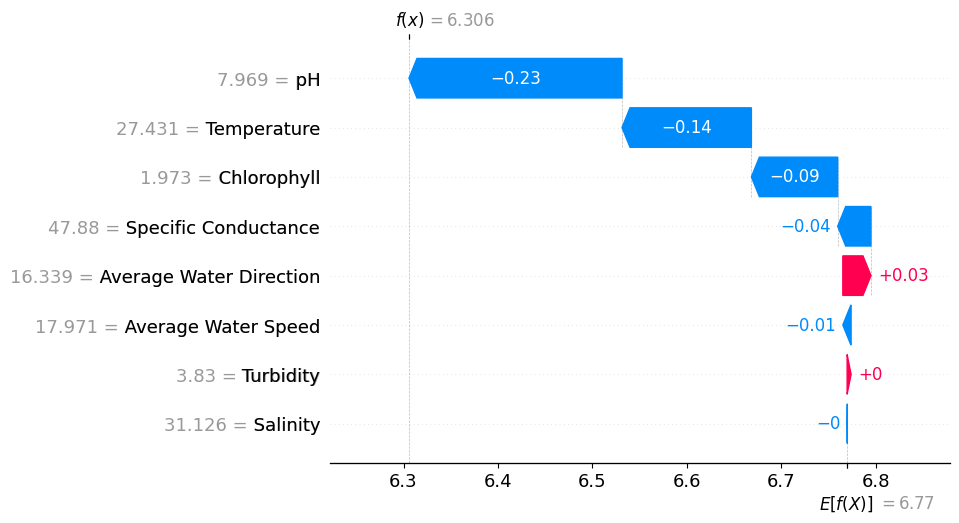

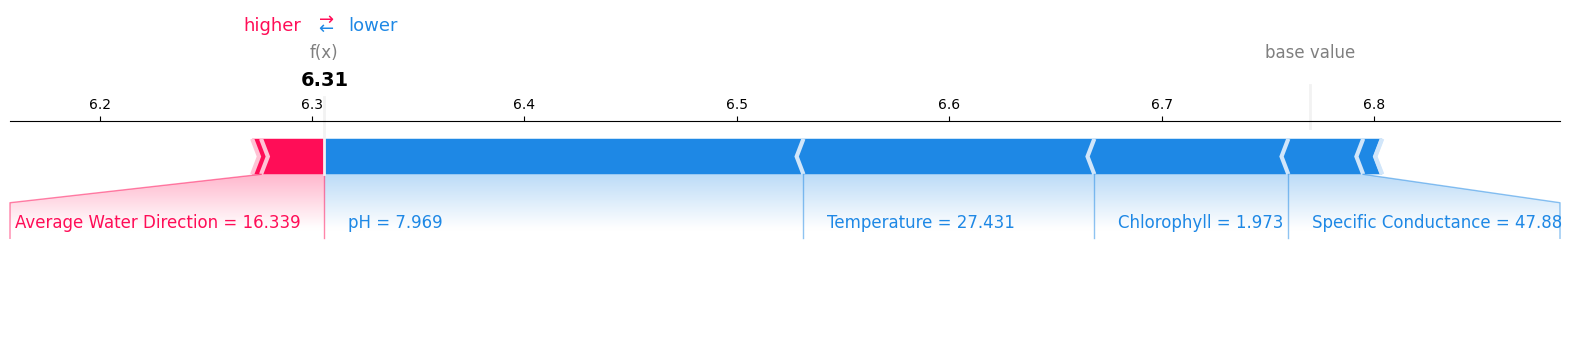

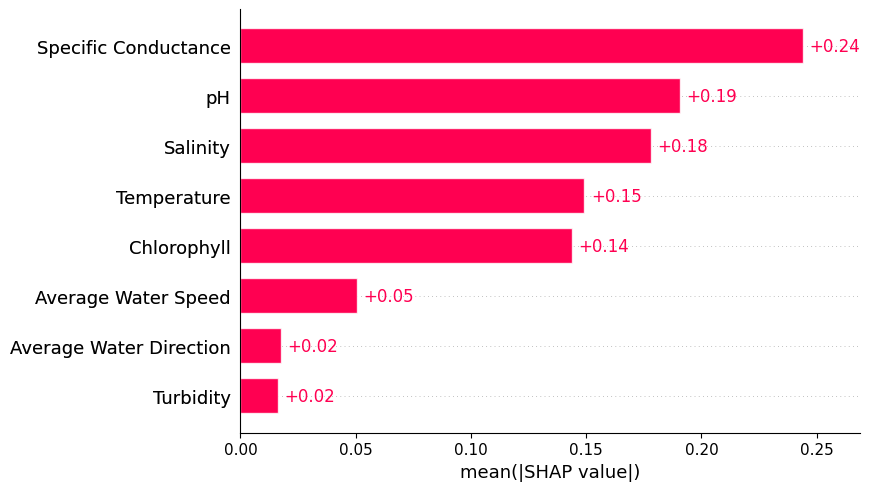

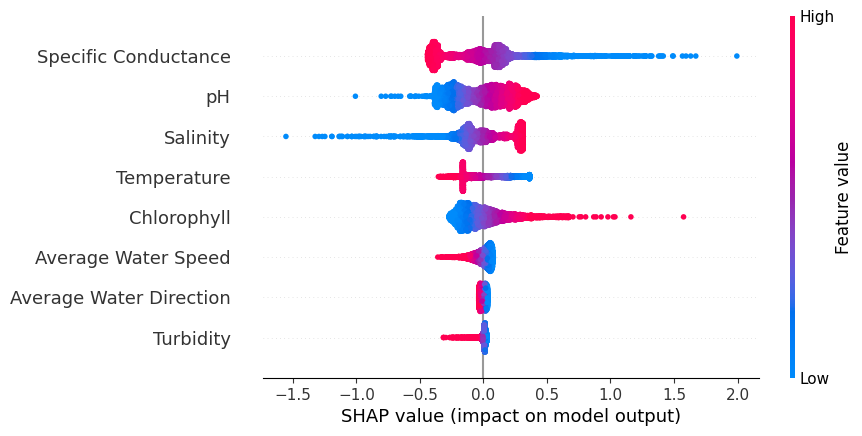

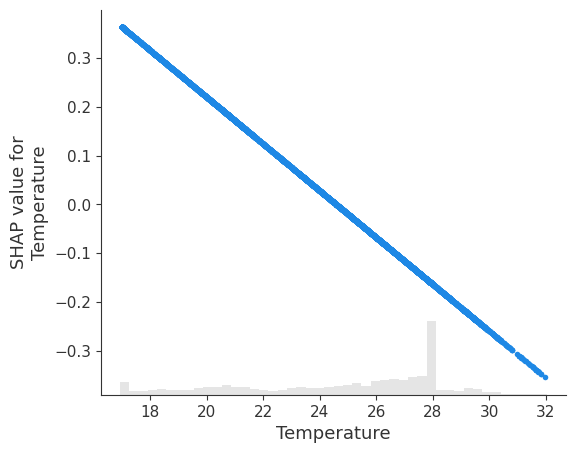

In [ ]:
shap_values_lr = shap_get_values(model_lr)

shap_local_plot(shap_values_lr)
shap_global_plot(shap_values_lr)

# force plot is slow for many rows, use a smaller sample
sample = shap.utils.sample(shap_values_lr, 100)
shap.plots.force(sample)


#### Random Forest Regressor

100%|===================| 6172/6179 [05:29<00:00]        

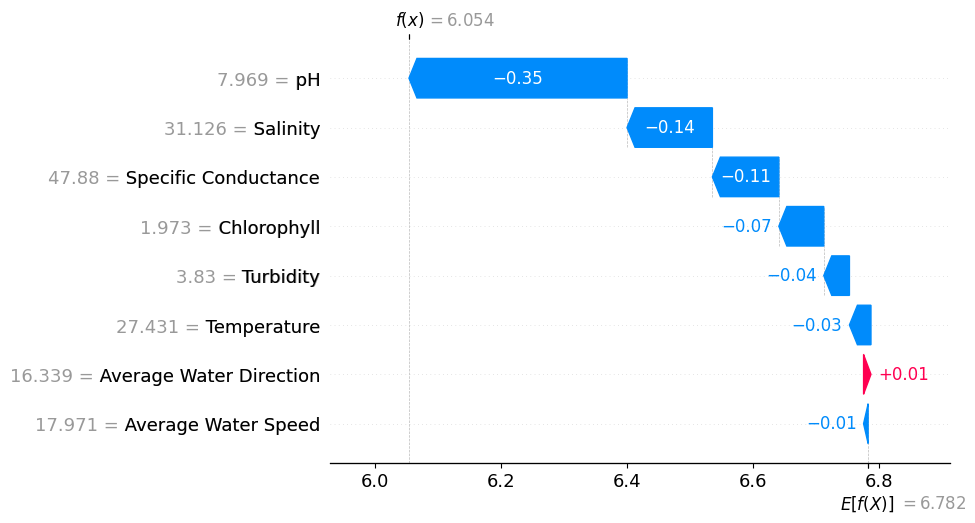

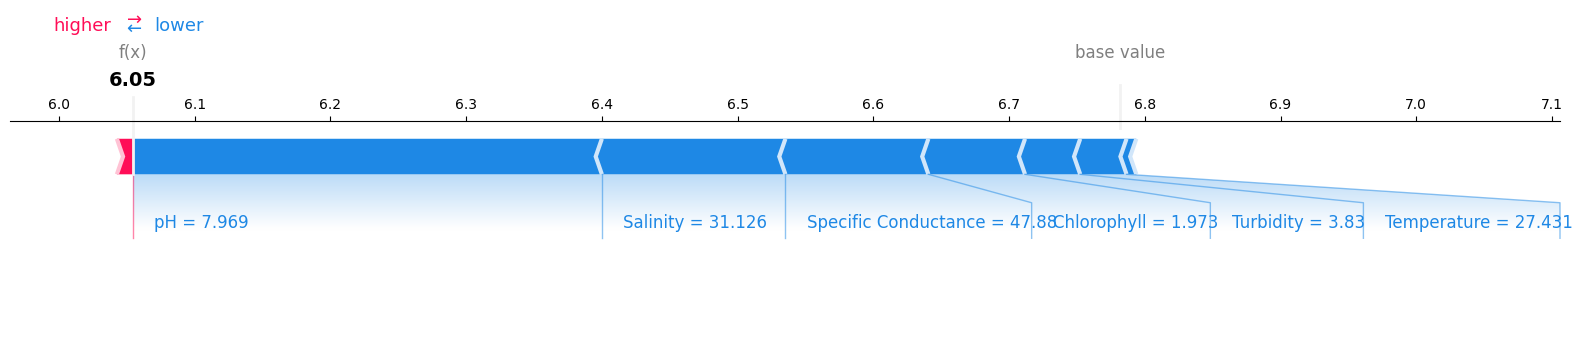

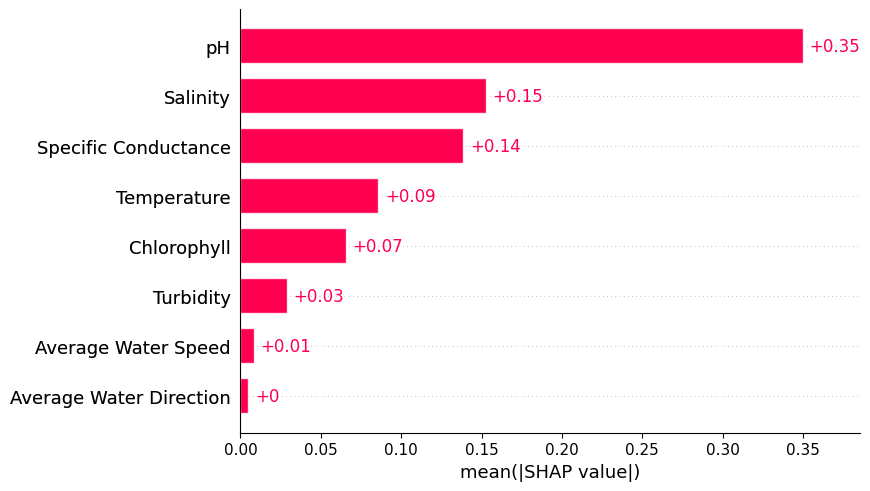

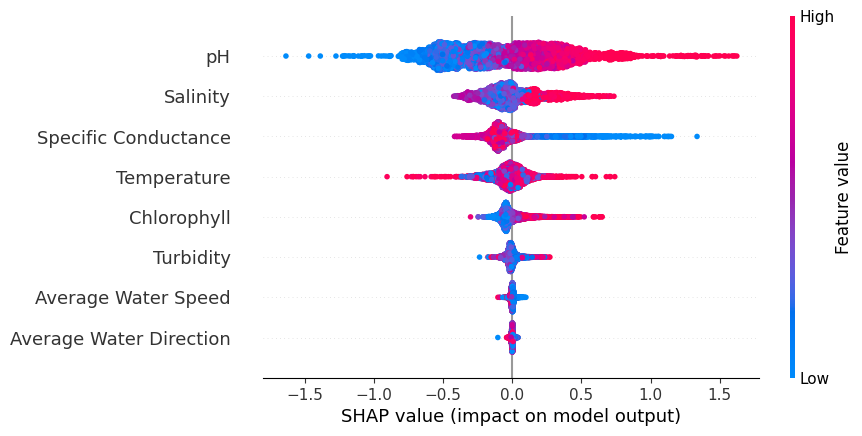

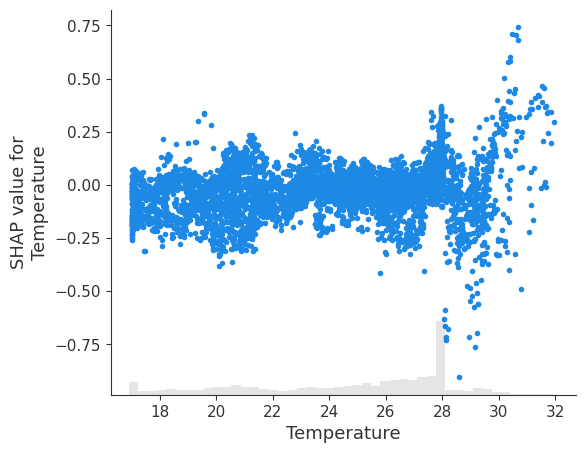

In [ ]:
shap_values_rfr = shap_get_values(model_rfr)

shap_local_plot(shap_values_rfr)
shap_global_plot(shap_values_rfr)

### LIME 

### PDP (Partial Dependence Plots)

### For the Linear Regression model

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Load data
df = pd.read_csv('../data/brisbane_water_quality.csv')  

# Convert Timestamp to datetime and extract time-based features
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Hour'] = df['Timestamp'].dt.hour  
df['Day'] = df['Timestamp'].dt.day  
df['Month'] = df['Timestamp'].dt.month  

# Select relevant features (Ensure these are truly impactful)
X = df.drop(columns=['Dissolved Oxygen', 'Dissolved Oxygen (%Saturation)', 'Record number', 'Timestamp'])
y = df['Dissolved Oxygen']

# Handle missing values using mean imputation
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model (ensure regression is the correct choice)
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Select key features based on domain knowledge or feature importance
feature_names = ["Temperature", "Chlorophyll"]  

# Ensure selected features exist in the dataset
missing_features = [col for col in feature_names if col not in X_train.columns]
if missing_features:
    raise ValueError(f"Missing features: {missing_features}")

# PDP Plot
fig, ax = plt.subplots(figsize=(10, 6))  

PartialDependenceDisplay.from_estimator(
    model_lr,
    X_train,
    features=feature_names,
    feature_names=feature_names,  
    grid_resolution=50,
    ax=ax  
)

plt.suptitle('Partial Dependence Plot for Linear Regression Model', fontsize=12)  
plt.subplots_adjust(top=0.9)  
plt.show()


: 

### XGBoost Regressor Implementation